In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_dir = "/kaggle/input/latest/MEL AND BKL (selective hair removal)/train"
test_dir = "/kaggle/input/latest/MEL AND BKL (selective hair removal)/test"

In [4]:
class_names = os.listdir(train_dir)
class_names

['mel', 'bkl']

In [5]:
# Loading the images
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode='binary',
                                                                image_size=(224,224),
                                                                )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode='binary',
                                                               image_size=(224,224),
                                                                shuffle=False
                                                                )

Found 1600 files belonging to 2 classes.
Found 400 files belonging to 2 classes.


In [6]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

# CNN

In [7]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

In [8]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense,BatchNormalization
from tensorflow.keras import layers
model_cnn = tf.keras.Sequential([
    #Additional data augmentation
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    
    Conv2D(32, 3, activation='relu',padding='same'),
    BatchNormalization(),
    MaxPool2D((3,3)),
    Dropout(0.50),
    
    Conv2D(64, 3, activation='relu',padding='same'),
    Conv2D(64, 3, activation='relu',padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.50),
    
    Conv2D(128, 3, activation='relu',padding='same'),
    Conv2D(128, 3, activation='relu',padding='same'),
    BatchNormalization(),
    MaxPool2D((2,2)),
    Dropout(0.50),
    
    
    Flatten(),
    Dense(1024,activation='relu'),
    Dropout(0.5),
    Dense(512,activation="relu"),
    Dense(1,activation='sigmoid',name="cnn_output_dense")
])

In [9]:
model_cnn.compile(loss="binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [10]:
start_time = time.time()
history_model_cnn = model_cnn.fit(train_data,
                                 epochs=20,
                                  steps_per_epoch = len(train_data),
                                  validation_steps=len(test_data),
                                  validation_data = test_data,
                                callbacks=[learning_rate_reduction]
                                 )

end_time = time.time()
training_time_cnn = end_time - start_time

Epoch 1/20


2024-03-22 07:21:02.429560: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


50/50 [==============================] - 18s 158ms/step - loss: 3.2121 - accuracy: 0.8219 - val_loss: 19.8296 - val_accuracy: 0.4950 - lr: 0.0010
Epoch 2/20
50/50 [==============================] - 7s 127ms/step - loss: 1.7215 - accuracy: 0.8519 - val_loss: 0.4907 - val_accuracy: 0.8350 - lr: 0.0010
Epoch 3/20
50/50 [==============================] - 7s 124ms/step - loss: 0.5791 - accuracy: 0.8800 - val_loss: 0.2878 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 4/20
50/50 [==============================] - 7s 126ms/step - loss: 0.2964 - accuracy: 0.9056 - val_loss: 0.3982 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 5/20
50/50 [==============================] - 7s 125ms/step - loss: 0.2676 - accuracy: 0.9112 - val_loss: 0.2126 - val_accuracy: 0.9175 - lr: 0.0010
Epoch 6/20
50/50 [==============================] - 7s 125ms/step - loss: 0.4121 - accuracy: 0.9031 - val_loss: 0.1782 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 7/20
50/50 [==============================] - 7s 127ms/step - loss: 0.210

In [12]:
pd.DataFrame(history_model_cnn.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,3.212066,0.821875,19.829613,0.4950,0.001000
1,1.721510,0.851875,0.490674,0.8350,0.001000
2,0.579071,0.880000,0.287760,0.9125,0.001000
3,0.296373,0.905625,0.398203,0.9000,0.001000
4,0.267580,0.911250,0.212628,0.9175,0.001000
5,0.412055,0.903125,0.178221,0.9550,0.001000
6,0.210518,0.921250,0.141676,0.9450,0.001000
7,0.245844,0.928125,0.146523,0.9450,0.001000
8,0.217110,0.924375,0.128436,0.9550,0.000500
9,0.239004,0.931250,0.125621,0.9600,0.000500


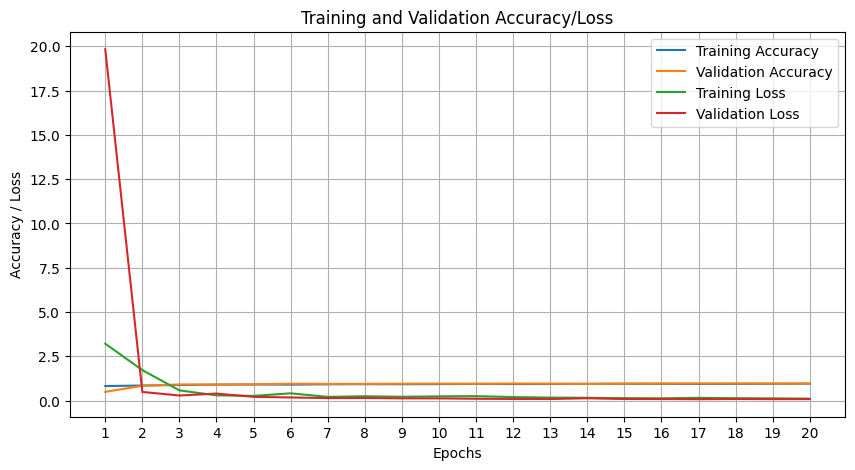

In [26]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 5))

epochs = range(1, len(history_model_cnn.history['accuracy']) + 1)

plt.plot(epochs, history_model_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_model_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, history_model_cnn.history['loss'], label='Training Loss')
plt.plot(epochs, history_model_cnn.history['val_loss'], label='Validation Loss')
# plt.plot(epochs, history_model_cnn.history['lr'], label="Learning Rate")

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.legend()
plt.grid(True)

plt.xticks(range(1, 21))  # Set x-axis ticks to whole numbers from 1 to 20
plt.show()

In [27]:
model_cnn.evaluate(test_data)

13/13 [==============================] - 1s 74ms/step - loss: 0.0848 - accuracy: 0.9650


[0.08479227125644684, 0.9649999737739563]

In [28]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                        

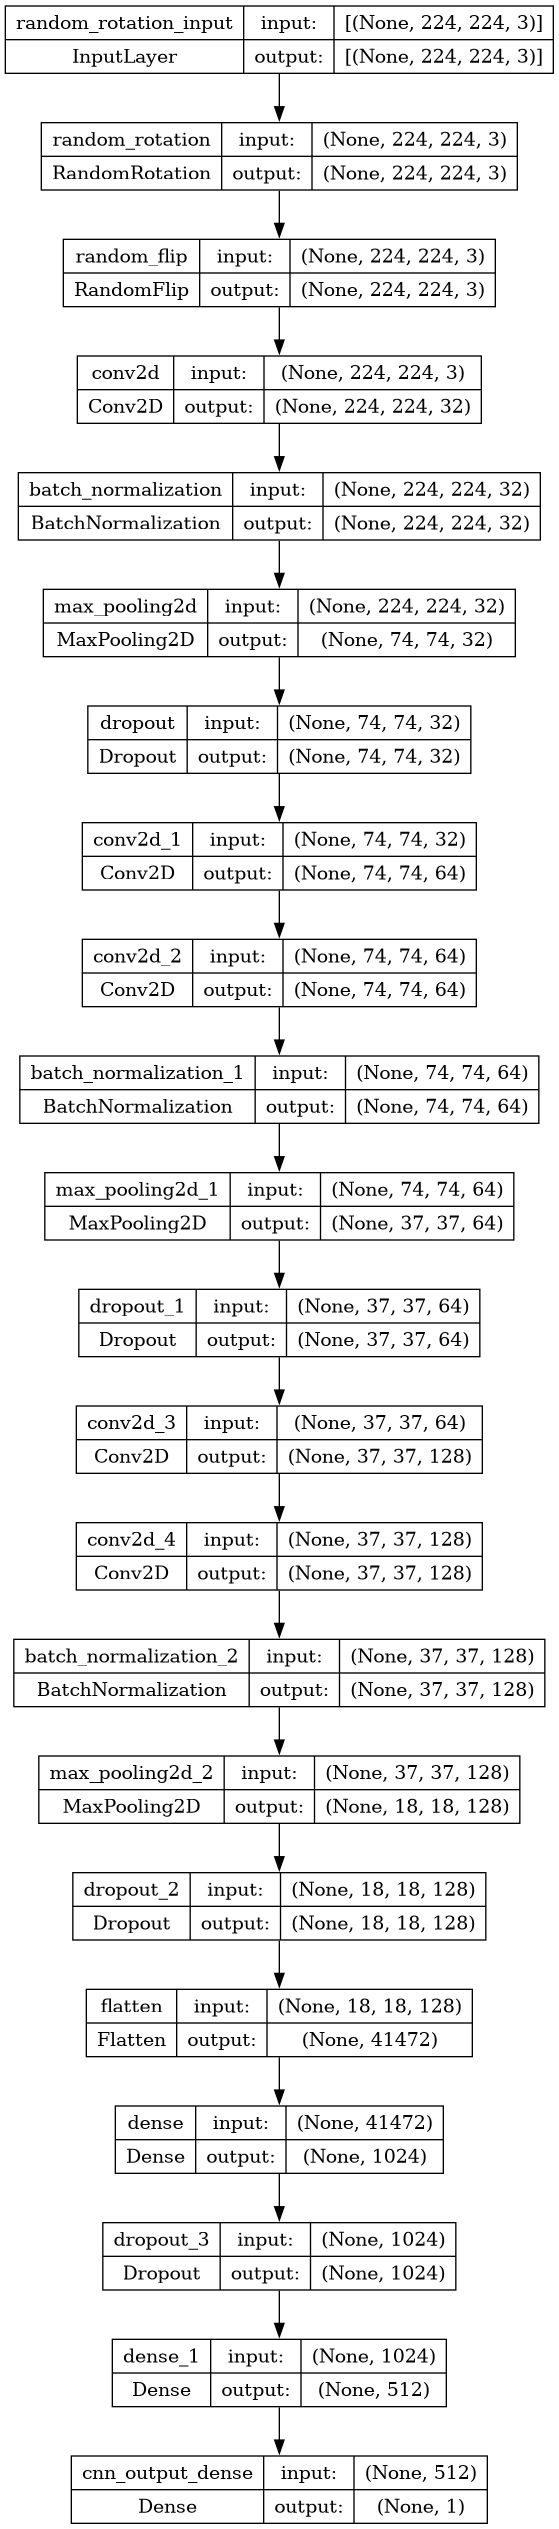

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model_cnn,show_shapes=True)

In [30]:
y_pred = model_cnn.predict(test_data)

13/13 [==============================] - 1s 82ms/step


In [31]:
y_pred[:10]

array([[9.0479414e-04],
       [5.4776314e-07],
       [6.2126267e-01],
       [7.1729742e-02],
       [1.5895108e-05],
       [1.5631544e-03],
       [2.0955078e-01],
       [1.5652485e-02],
       [8.0155307e-01],
       [5.1616994e-04]], dtype=float32)

In [32]:
y_pred = tf.squeeze(np.round(y_pred))
y_pred

<tf.Tensor: shape=(400,), dtype=float32, numpy=
array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [33]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy()) # append the index which has the largest value (labels are one-hot)
y_labels = np.array(y_labels)
y_labels[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [34]:
y_labels.shape

(400, 1)

In [35]:
y_labels = np.squeeze(y_labels)

In [36]:
y_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Accuracy: 0.965
Precision: 0.965
Recall: 0.965
F1 Score: 0.965


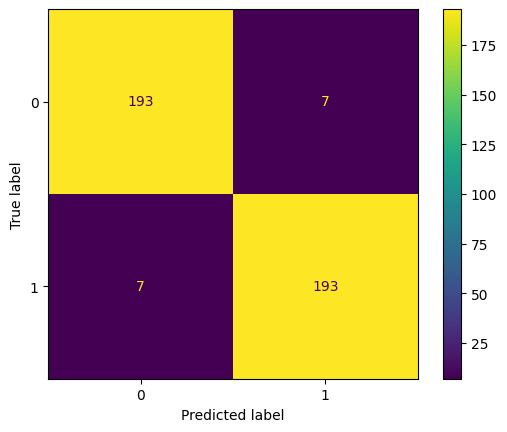

In [37]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,ConfusionMatrixDisplay, recall_score

accuracy_cnn = accuracy_score(y_labels, y_pred)
precision_cnn = precision_score(y_labels, y_pred)
recall_cnn = recall_score(y_labels, y_pred)
f1_cnn = f1_score(y_labels, y_pred)

print(f"Accuracy: {accuracy_cnn:.3f}")
print(f"Precision: {precision_cnn:.3f}")
print(f"Recall: {recall_cnn:.3f}")
print(f"F1 Score: {f1_cnn:.3f}")

cm_cnn = confusion_matrix(y_labels, y_pred)
cm_disp_cnn = ConfusionMatrixDisplay(cm_cnn)
cm_disp_cnn.plot()
plt.show()

cnn_model_results = {
    "Accuracy": accuracy_cnn,
    "Precision": precision_cnn,
    "Recall": recall_cnn,
    "F1 Score": f1_cnn,
    "Training time":training_time_cnn
}


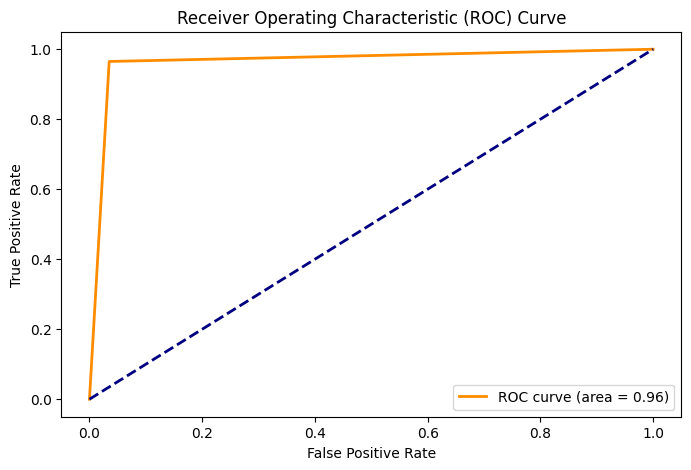

In [38]:
from sklearn.metrics import roc_curve, auc

fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_labels, y_pred)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
plt.figure(figsize=(8, 5))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## RESNET50


In [39]:
import tensorflow_hub as hub
from tensorflow.keras import layers
base_model_resnet = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/feature-vector/versions/1",
                   trainable=False,
                  name="resent_model")

inputs = layers.Input(shape=(224,224,3),name="input_layer")
x = tf.keras.layers.Rescaling(1/255.)(inputs)
x = base_model_resnet(x,training=False)
x = layers.Dropout(0.4)(x)
x = layers.Dense(15, activation="sigmoid")(x)
outputs = layers.Dense(1,activation='sigmoid',name='resnet_output_dense')(x)

model_resnet = tf.keras.Model(inputs,outputs)

In [40]:
model_resnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 resent_model (KerasLayer)   (None, 2048)              23561152  
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 15)                30735     
                                                                 
 resnet_output_dense (Dense  (None, 1)                 16        
 )                                                               
                                                             

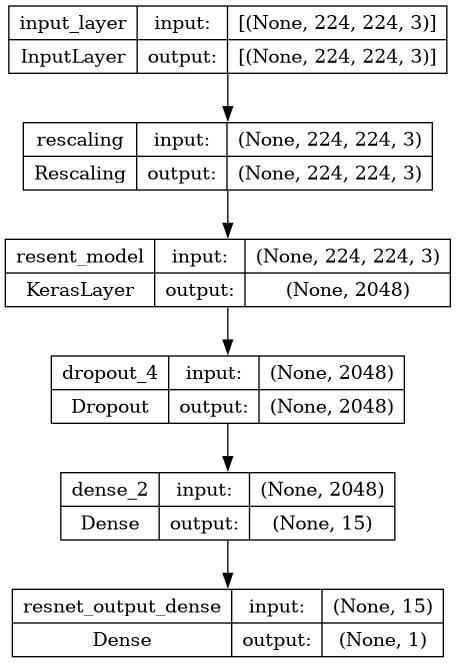

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model_resnet,show_shapes=True)

In [42]:
model_resnet.compile(loss='binary_crossentropy',
                      optimizer= tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [45]:
start_time = time.time()
history_model_resnet = model_resnet.fit(train_data,
                                       epochs=10,
                                       validation_data=test_data,
                                        steps_per_epoch = len(train_data),
                                        validation_steps = len(test_data),
                                       callbacks = [learning_rate_reduction])
end_time = time.time()
training_time_resnet = end_time - start_time

Epoch 1/10
50/50 [==============================] - 7s 125ms/step - loss: 0.1712 - accuracy: 0.9413 - val_loss: 0.1305 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 2/10
50/50 [==============================] - 7s 126ms/step - loss: 0.1615 - accuracy: 0.9419 - val_loss: 0.1105 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 3/10
50/50 [==============================] - 7s 127ms/step - loss: 0.1466 - accuracy: 0.9488 - val_loss: 0.1046 - val_accuracy: 0.9675 - lr: 0.0010
Epoch 4/10
50/50 [==============================] - 7s 131ms/step - loss: 0.1487 - accuracy: 0.9450 - val_loss: 0.1044 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 5/10
50/50 [==============================] - ETA: 0s - loss: 0.1384 - accuracy: 0.9513
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
50/50 [==============================] - 7s 129ms/step - loss: 0.1384 - accuracy: 0.9513 - val_loss: 0.1066 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 6/10
50/50 [==============================] - 7s 130ms/step 

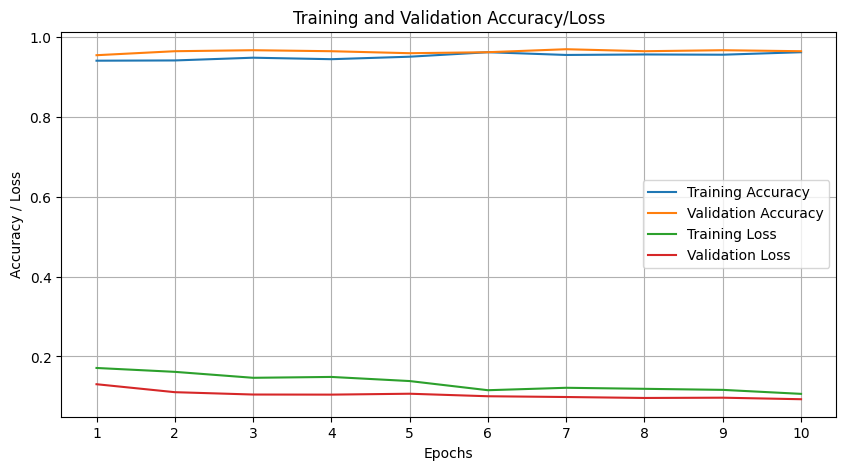

In [46]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(10, 5))

epochs = range(1, len(history_model_resnet.history['accuracy']) + 1)

plt.plot(epochs, history_model_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_model_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, history_model_resnet.history['loss'], label='Training Loss')
plt.plot(epochs, history_model_resnet.history['val_loss'], label='Validation Loss')
# plt.plot(epochs, history_model_cnn.history['lr'], label="Learning Rate")

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Accuracy/Loss')
plt.legend()
plt.grid(True)

plt.xticks(range(1, 11))  # Set x-axis ticks to whole numbers from 1 to 20
plt.show()

In [47]:
model_resnet.evaluate(test_data)

13/13 [==============================] - 1s 95ms/step - loss: 0.0929 - accuracy: 0.9650


[0.09286832064390182, 0.9649999737739563]

In [49]:
y_pred_resnet = model_resnet.predict(test_data)

13/13 [==============================] - 1s 99ms/step


In [50]:
y_pred_resnet[:5]

array([[0.03283598],
       [0.01581477],
       [0.03488943],
       [0.0234047 ],
       [0.01338717]], dtype=float32)

In [51]:
y_pred_resnet = np.squeeze(np.round(y_pred_resnet))

In [52]:
y_pred_resnet

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

Accuracy: 0.965
Precision: 0.965
Recall: 0.965
F1 Score: 0.965


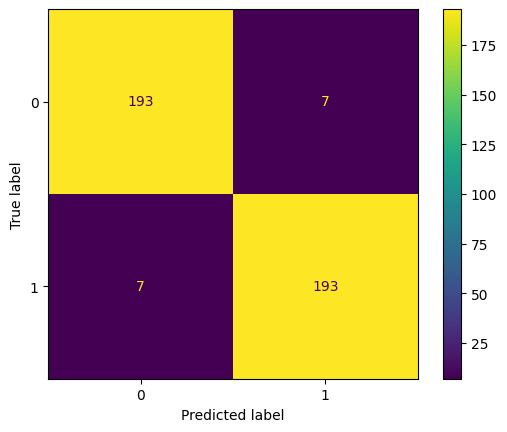

In [53]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score

accuracy = accuracy_score(y_labels, y_pred_resnet)
precision = precision_score(y_labels, y_pred_resnet)
recall = recall_score(y_labels, y_pred_resnet)
f1 = f1_score(y_labels, y_pred_resnet)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

cm = confusion_matrix(y_labels, y_pred_resnet)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.show()

resnet_model_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Training time" : training_time_resnet
}


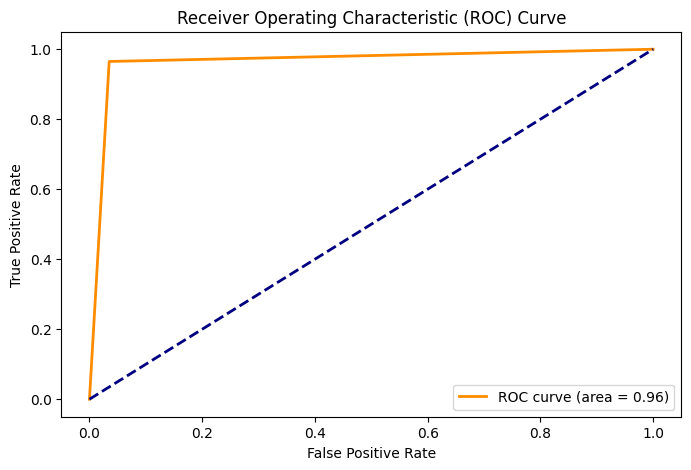

In [54]:
from sklearn.metrics import roc_curve, auc

fpr_resnet, tpr_resnet, thresholds_cnn = roc_curve(y_labels, y_pred_resnet)
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)
plt.figure(figsize=(8, 5))
plt.plot(fpr_resnet, tpr_resnet, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_resnet:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Making predictions on random images from the test data

In [55]:
def load_and_preprocess(filepath,image_shape=[224,224]): 
    
    """Reads in an image from filename, turns it into a tensor and reshapes into
      (224, 224, 3).

      Parameters
      ----------
      filename (str): string filename of target image
      img_shape (int): size to resize target image to, default 224"""
    
    random_class = random.choice(os.listdir(filepath))
    random_image_name = random.choice(os.listdir(filepath+random_class+"/"))
    random_image_path = filepath + random_class + '/' + random_image_name
    
    img = tf.io.read_file(random_image_path)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, image_shape)
    img = tf.cast(img, tf.float32)
#     img = tf.expand_dims(img,axis=0)
    
    return (img, random_class)


## Testing Resnet Model

In [56]:
def test_resnet_model():
        # Displaying the results
    plt.figure(figsize=(10,7))
    for i in range(6):
        img,true_class = load_and_preprocess("/kaggle/input/skin-disease-4/MEL AND BKL (NEW-4)/test/")
        pred_prob = model_resnet.predict(tf.expand_dims(img,axis=0))
        pred_class = np.squeeze(np.round(pred_prob))

        plt.subplot(2,3,i+1)
        plt.imshow(img/255.)

        if(pred_class==1.0):
            result="mel"

        else:
            result="bkl"

        plt.title(f"Actual class: {true_class}\nPredicted class: {result}")
        plt.axis(False);

1/1 [==============================] - 0s 22ms/step


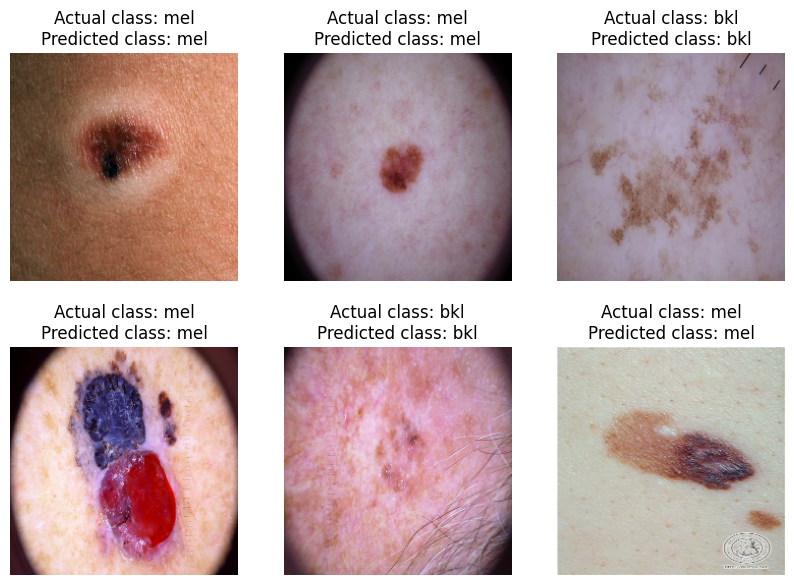

In [57]:
test_resnet_model()

## Testing CNN Model

In [58]:
model_cnn.layers

In [59]:
def test_cnn_model():
        # Displaying the results
    plt.figure(figsize=(10,7))
    for i in range(6):
        img,true_class = load_and_preprocess("/kaggle/input/skin-disease-4/MEL AND BKL (NEW-4)/test/")
        pred_prob = model_cnn.predict(tf.expand_dims(img,axis=0))
        pred_class = np.squeeze(np.round(pred_prob))

        plt.subplot(2,3,i+1)
        plt.imshow(img/255.)

        if(pred_class==1.0):
            result="mel"

        else:
            result="bkl"

        plt.title(f"Actual class: {true_class}\nPredicted class: {result}")
        plt.axis(False);

1/1 [==============================] - 0s 19ms/step


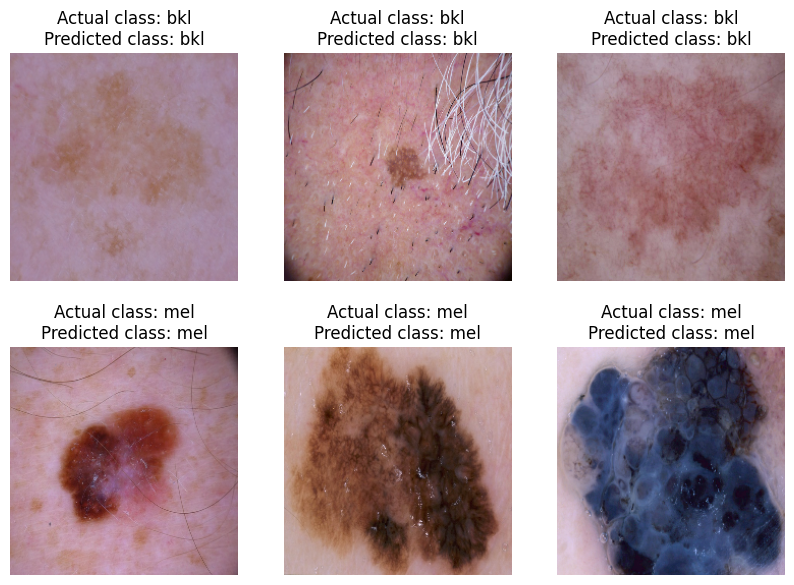

In [60]:
test_cnn_model()

# Extracting features from CNN and Resnet50 

In [61]:
# Loading the images
train_data_unshuffled = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode='binary',
                                                                image_size=(224,224),
                                                                shuffle=False
                                                                )

Found 1600 files belonging to 2 classes.


## CNN

In [62]:
model_cnn_without_dense = model_cnn.layers[-2].output
model_cnn_new_dense = layers.Dense(512,name="feature_extraction_layer_cnn")(model_cnn_without_dense)

feature_extraction_cnn = tf.keras.models.Model(inputs=model_cnn.input, outputs=model_cnn_new_dense)

In [63]:
feature_extraction_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_input (Inp  [(None, 224, 224, 3)]     0         
 utLayer)                                                        
                                                                 
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                           

In [64]:
extracted_features_cnn = feature_extraction_cnn.predict(train_data_unshuffled)

50/50 [==============================] - 4s 69ms/step


In [65]:
extracted_features_cnn.shape

(1600, 512)

In [66]:
extracted_features_cnn[:5]

array([[-2.8194025,  0.9354925, -4.3625746, ..., -0.9287953, -1.4845449,
         4.307378 ],
       [-1.037321 ,  2.344497 , -4.77979  , ..., -1.1559051, -1.2345034,
         4.57555  ],
       [-1.851999 ,  1.6787901, -4.035122 , ..., -1.3303635, -1.1525013,
         3.7956944],
       [-1.4221712,  3.5868645, -5.727764 , ..., -1.2776746, -0.5274519,
         4.6140633],
       [-2.5269606,  1.7857218, -5.008237 , ..., -1.323925 , -1.0460929,
         3.9990137]], dtype=float32)

## Resnet

In [67]:
model_resnet.layers

In [68]:
model_resnet_without_dense = model_resnet.layers[-3].output
model_resnet_new_dense = layers.Dense(512,name="feature_extraction_layer_resnet")(model_resnet_without_dense)

feature_extraction_resnet = tf.keras.models.Model(inputs=model_resnet.input, outputs=model_resnet_new_dense)

In [69]:
feature_extraction_resnet.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 resent_model (KerasLayer)   (None, 2048)              23561152  
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 feature_extraction_layer_r  (None, 512)               1049088   
 esnet (Dense)                                                   
                                                                 
Total params: 24610240 (93.88 MB)
Trainable params: 1049088 (4.00 MB)
Non-trainable params: 23561152 (89.88 MB)
_____________

In [70]:
extracted_features_resnet = feature_extraction_resnet.predict(train_data_unshuffled)

50/50 [==============================] - 5s 93ms/step


In [71]:
extracted_features_resnet.shape

(1600, 512)

In [72]:
extracted_features_resnet[:5]

array([[ 1.1478839 ,  0.5161135 , -0.09603268, ..., -0.41013917,
         0.8286675 ,  1.007531  ],
       [ 0.48042256,  1.9032412 ,  0.23207515, ...,  1.1810999 ,
        -0.35795367,  0.15530711],
       [ 2.049591  ,  0.6829406 ,  0.36294198, ...,  0.3298229 ,
        -0.31755373,  0.49205422],
       [-0.57392466,  0.9472935 , -1.1572582 , ...,  1.1558864 ,
         0.37309232,  0.57487905],
       [ 1.0705191 ,  0.38461336,  0.37965894, ...,  0.5758136 ,
        -0.3334387 ,  0.48018283]], dtype=float32)

## Combining the features

In [73]:
combined_features = 0.5*(extracted_features_cnn + extracted_features_resnet)

In [74]:
combined_features.shape

(1600, 512)

In [75]:
combined_features[:5]

array([[-0.8357593 ,  0.725803  , -2.2293036 , ..., -0.6694672 ,
        -0.32793868,  2.6574545 ],
       [-0.2784492 ,  2.123869  , -2.2738574 , ...,  0.01259738,
        -0.7962285 ,  2.3654287 ],
       [ 0.09879601,  1.1808653 , -1.83609   , ..., -0.5002703 ,
        -0.73502755,  2.1438742 ],
       [-0.99804795,  2.2670789 , -3.442511  , ..., -0.06089407,
        -0.07717977,  2.5944712 ],
       [-0.72822076,  1.0851675 , -2.314289  , ..., -0.3740557 ,
        -0.6897658 ,  2.2395983 ]], dtype=float32)

## Passing the combined features to ELM

In [76]:
y_train_labels = []
for images, labels in train_data_unshuffled.unbatch(): # unbatch the test data and get images and labels
  y_train_labels.append(labels.numpy()) # append the index which has the largest value (labels are one-hot)
y_train_labels = np.array(y_train_labels)
y_train_labels[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [77]:
y_train_labels = np.squeeze(y_train_labels)

In [78]:
y_train_labels, y_train_labels.shape

(array([0., 0., 0., ..., 1., 1., 1.], dtype=float32), (1600,))

In [79]:
import pandas as pd

# Assuming combined_features and y_train_labels are defined earlier
features_df = pd.DataFrame({
    "combined_features": combined_features.tolist(),  # Convert NumPy array to list
    "labels": y_train_labels.tolist()  # Convert NumPy array to list
})

# Display the DataFrame
features_df.head()

,combined_features,labels
0,"[-0.8357592821121216, 0.725803017616272, -2.22...",0.0
1,"[-0.2784492075443268, 2.123868942260742, -2.27...",0.0
2,"[0.09879601001739502, 1.1808652877807617, -1.8...",0.0
3,"[-0.998047947883606, 2.2670788764953613, -3.44...",0.0
4,"[-0.7282207608222961, 1.0851675271987915, -2.3...",0.0


In [80]:
# Shuffle the DataFrame
shuffled_features_df = features_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shuffled DataFrame
shuffled_features_df.head()


,combined_features,labels
0,"[-1.4195890426635742, 0.9614470601081848, -2.5...",0.0
1,"[-0.16165496408939362, 1.3724515438079834, -2....",0.0
2,"[0.4162522554397583, 1.4805675745010376, -2.98...",0.0
3,"[-0.972443163394928, 1.07010817527771, 0.11723...",0.0
4,"[0.17714375257492065, -0.29553213715553284, -0...",1.0


In [81]:
combined_features_shuffled = shuffled_features_df["combined_features"].to_numpy()
y_train_labels = shuffled_features_df["labels"].to_numpy()

In [82]:
combined_features_shuffled = np.stack(combined_features_shuffled)


In [83]:
combined_features_shuffled.shape, y_train_labels.shape

((1600, 512), (1600,))

In [84]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Create an ELM model
elm_model = MLPClassifier(hidden_layer_sizes=(256,), activation='relu', max_iter=1000, random_state=42)

start_time_elm = time.time()

# Train the ELM model
elm_model.fit(combined_features_shuffled, y_train_labels)

end_time_elm = time.time()

training_time_elm = end_time_elm-start_time_elm


## Evaluating the ELM model

In [85]:
extracted_features_cnn_test = feature_extraction_cnn.predict(test_data)

13/13 [==============================] - 1s 68ms/step


In [86]:
extracted_features_cnn_test.shape

(400, 512)

In [87]:
extracted_features_resnet_test = feature_extraction_resnet.predict(test_data)

13/13 [==============================] - 1s 95ms/step


In [88]:
extracted_features_resnet_test.shape

(400, 512)

In [89]:
combined_features_test = 0.5*(extracted_features_resnet_test + extracted_features_cnn_test)

In [90]:
combined_features_test.shape

(400, 512)

In [91]:
elm_preds = elm_model.predict(combined_features_test) 

In [92]:
elm_preds.shape

(400,)

Accuracy: 0.980
Precision: 0.980
Recall: 0.980
F1 Score: 0.980


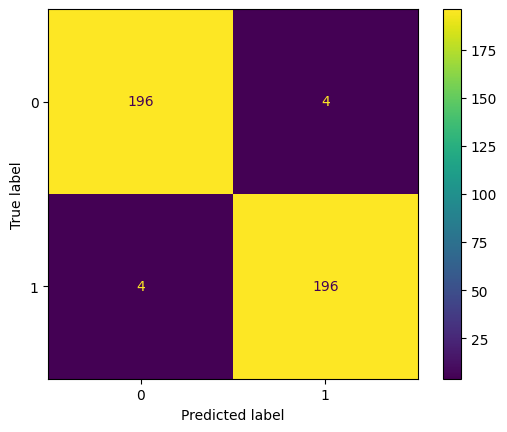

In [93]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score

accuracy = accuracy_score(y_labels, elm_preds)
precision = precision_score(y_labels, elm_preds)
recall = recall_score(y_labels, elm_preds)
f1 = f1_score(y_labels, elm_preds)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

cm = confusion_matrix(y_labels, elm_preds)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.show()

elm_model_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Training time":training_time_elm
}


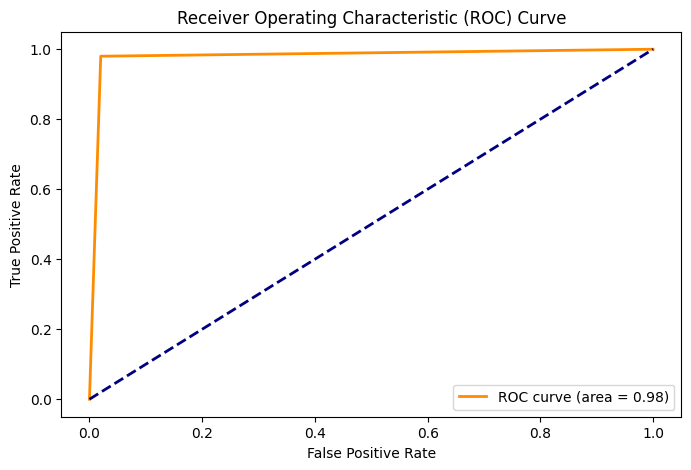

In [94]:
from sklearn.metrics import roc_curve, auc

fpr_elm, tpr_elm, thresholds_elm = roc_curve(y_labels, elm_preds)
roc_auc_elm = auc(fpr_elm, tpr_elm)
plt.figure(figsize=(8, 5))
plt.plot(fpr_elm, tpr_elm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_elm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Passing features to SVM

In [95]:
# Example usage with SVM classifier
from sklearn.svm import SVC

start_time = time.time()

svm_model = SVC(kernel='linear')
svm_model.fit(combined_features_shuffled, y_train_labels)

end_time=time.time()
training_time_svm = end_time - start_time


In [96]:
svm_preds = svm_model.predict(combined_features_test)

Accuracy: 0.968
Precision: 0.975
Recall: 0.960
F1 Score: 0.967


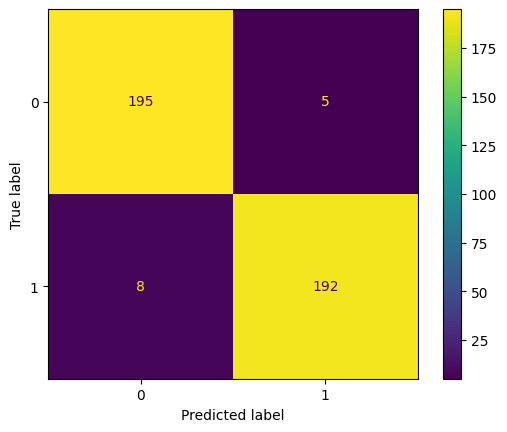

In [97]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, recall_score

accuracy = accuracy_score(y_labels, svm_preds)
precision = precision_score(y_labels, svm_preds)
recall = recall_score(y_labels, svm_preds)
f1 = f1_score(y_labels, svm_preds)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

cm = confusion_matrix(y_labels, svm_preds)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()
plt.show()


svm_model_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Training time":training_time_svm
}

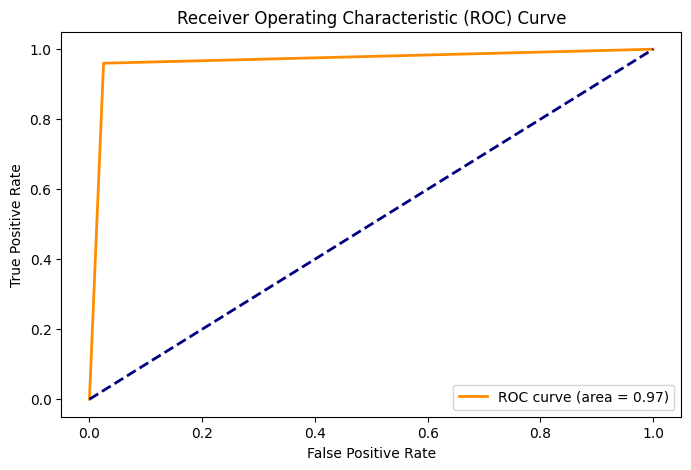

In [98]:
from sklearn.metrics import roc_curve, auc

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_labels, svm_preds)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8, 5))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Testing the combined model

In [99]:
def test_elm():
    # Displaying the results
    plt.figure(figsize=(10,7))
    for i in range(6):
        img,true_class = load_and_preprocess("/kaggle/input/skin-disease-4/MEL AND BKL (NEW-4)/test/")
        img = tf.expand_dims(img,axis=0)
        features_cnn = feature_extraction_cnn.predict(img)
        features_resnet = feature_extraction_resnet.predict(img)
        combined_features = 0.5*(features_cnn + features_resnet)
        
        pred_class = elm_model.predict(combined_features)
        

        plt.subplot(2,3,i+1)
        plt.imshow(tf.squeeze(img/255.))
        
        
        if(pred_class==1.0):
            result="mel"

        else:
            result="bkl"

        plt.title(f"Actual class: {true_class}\nPredicted class: {result}")
        plt.axis(False);

1/1 [==============================] - 0s 22ms/step


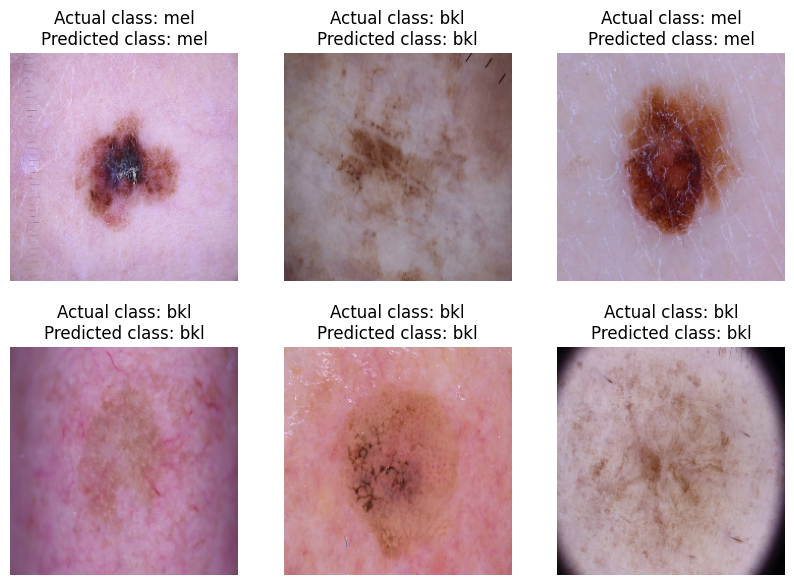

In [109]:
test_elm()

In [101]:
def test_svm():
    # Displaying the results
    plt.figure(figsize=(10,7))
    for i in range(6):
        img,true_class = load_and_preprocess("/kaggle/input/skin-disease-4/MEL AND BKL (NEW-4)/test/")
        img = tf.expand_dims(img,axis=0)
        features_cnn = feature_extraction_cnn.predict(img)
        features_resnet = feature_extraction_resnet.predict(img)
        combined_features = 0.5*(features_cnn + features_resnet)
        
        pred_class = svm_model.predict(combined_features)
        

        plt.subplot(2,3,i+1)
        plt.imshow(tf.squeeze(img/255.))
        
        
        if(pred_class==1.0):
            result="mel"

        else:
            result="bkl"

        plt.title(f"Actual class: {true_class}\nPredicted class: {result}")
        plt.axis(False);

1/1 [==============================] - 0s 22ms/step


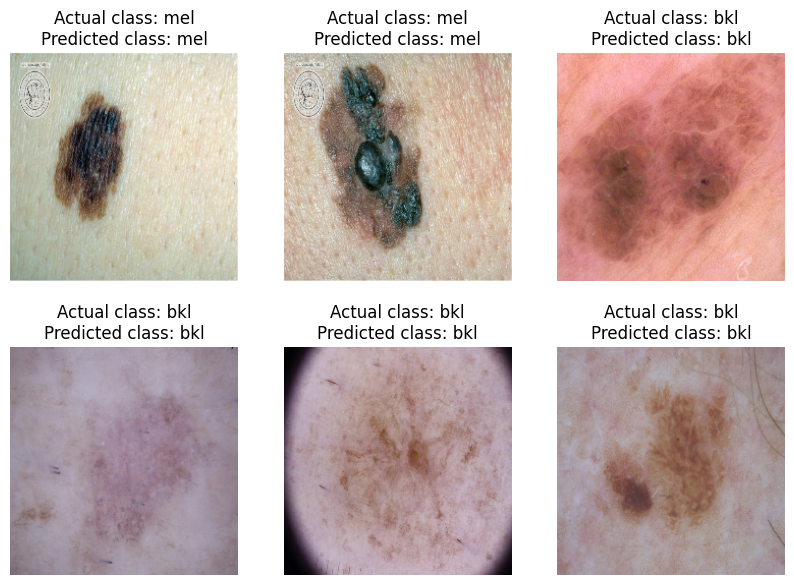

In [102]:
test_svm()

# Comparing the results of all the models

In [103]:
final_results = {
    "CNN" : cnn_model_results,
    "Resnet 50":resnet_model_results,
    "ELM":elm_model_results,
    "SVM":svm_model_results
}
final_results = pd.DataFrame(final_results).transpose()*100
final_results

,Accuracy,Precision,Recall,F1 Score,Training time
CNN,96.50,96.500000,96.5,96.500000,15012.349296
Resnet 50,96.50,96.500000,96.5,96.500000,7027.257681
ELM,98.00,98.000000,98.0,98.000000,304.786587
SVM,96.75,97.461929,96.0,96.725441,6.748033


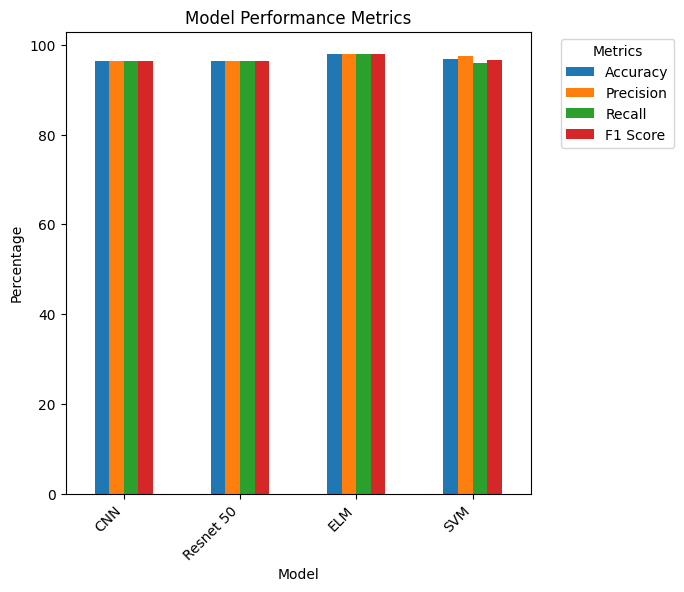

In [104]:
import matplotlib.pyplot as plt

# Selecting only the accuracy, precision, recall, and f1_score columns
metrics_to_plot = final_results[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Plotting the bar graph
metrics_to_plot.plot(kind='bar', figsize=(6,6))
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


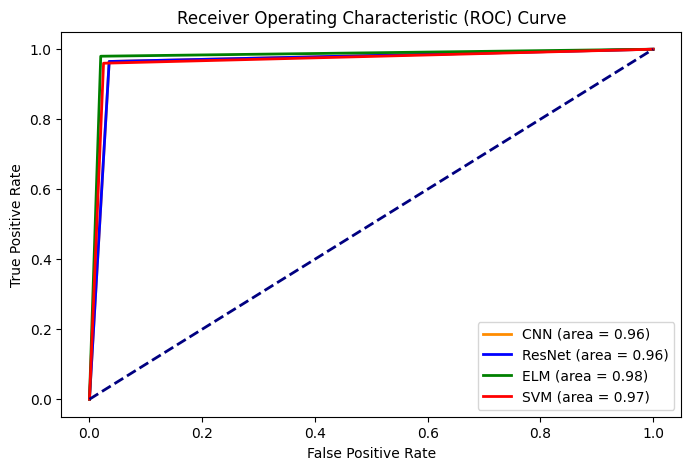

In [105]:
# Plotting all ROC curves in a single graph
plt.figure(figsize=(8, 5))

plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'CNN (area = {roc_auc_cnn:.2f})')
plt.plot(fpr_resnet, tpr_resnet, color='blue', lw=2, label=f'ResNet (area = {roc_auc_resnet:.2f})')
plt.plot(fpr_elm, tpr_elm, color='green', lw=2, label=f'ELM (area = {roc_auc_elm:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [106]:
from sklearn.metrics import classification_report
models = {
    'ELM': elm_preds,
    'SVM': svm_preds,
    'ResNet50': y_pred_resnet,
    'CNN': y_pred
}

for model_name, predictions in models.items():
    print(f"\t\t\t{model_name}")
    print("=========================================================")
    cr = classification_report(y_labels, predictions)
    print(cr)
    print("\n")



			ELM
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       200
         1.0       0.98      0.98      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



			SVM
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       200
         1.0       0.97      0.96      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



			ResNet50
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       200
         1.0       0.96      0.96      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96 